# **Introduction to AI in the Workforce: A Job Market Analysis**
This analysis delves into the "AI-Powered Job Market Insights" dataset, offering a comprehensive exploration of how artificial intelligence (AI) and automation are influencing the modern job market. The dataset provides a snapshot of job listings across various industries, highlighting factors such as AI adoption levels, automation risk, and salary ranges. By examining these elements, we aim to uncover key trends and insights into how AI is reshaping employment opportunities and job market dynamics.

**Objective**
The primary objective of this analysis is to identify and understand key patterns related to salaries, required skills, remote work, and job market trends influenced by AI. By employing various analytical techniques, we seek to reveal how AI adoption impacts compensation, skill requirements, and job growth, as well as how it correlates with the likelihood of remote work.

**Data Overview**
The dataset includes the following key features:

- Job_Title: The title of the job role.
- Industry: The industry in which the job is located.
- Company_Size: The size of the company offering the job.
- Location: The geographic location of the job.
- AI_Adoption_Level: The extent to which the company has adopted AI in its operations.
- Automation_Risk: The estimated risk of the job being automated within the next 10 years.
- Required_Skills: The key skills required for the job role.
- Salary_USD: The annual salary offered for the job in USD.
- Remote_Friendly: Indicates whether the job can be performed remotely.
- Job_Growth_Projection: The projected growth or decline of the job role over the next five years.

**Analysis Highlights**
- Distribution of Salaries Across Industries and AI Adoption Levels: A box plot will illustrate how salaries differ across various industries, segmented by AI adoption levels. This analysis will help identify high-paying industries and assess the impact of AI on compensation.
- Skill Frequency Analysis: A count plot will show the frequency of required skills, segmented by AI adoption levels. This will reveal which skills are more common in roles with high AI adoption.
- Correlation Matrix: A heatmap will explore the relationships between numerical features such as salary, AI adoption, automation risk, and job growth. This will uncover trends and correlations, such as whether higher AI adoption is linked to increased salaries or reduced automation risk.
- AI Adoption Level Impact on Remote Work: A heatmap will examine the relationship between AI adoption levels and the likelihood of a job being remote-friendly, exploring if AI adoption promotes remote work opportunities.
- Industry-Specific Salary Distribution: A focused box plot will analyze salary distributions within the Technology industry, segmented by AI adoption level and automation risk, providing deeper insights into compensation within this sector.
- Clustering Analysis: KMeans clustering will group similar job roles based on AI adoption level, automation risk, and salary, helping to identify patterns and categorize jobs with similar characteristics.
- Point-Biserial Correlation: An analysis of the point-biserial correlation will explore the relationship between AI adoption levels and the correlation between remote work and salary, revealing how AI adoption influences this dynamic.

By combining these analyses, this report aims to provide a thorough understanding of how AI is transforming the job market, offering valuable insights into compensation trends, skill demands, and employment opportunities in an AI-driven landscape.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import pointbiserialr
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv("/kaggle/input/ai-powered-job-market-insights/ai_job_market_insights.csv")

In [2]:
# 1. Initial Data Inspection
print(df.info())
print(df.describe(include='all'))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB
None
             Job_Title       Industry Company_Size       Location  \
count              500            500          500            500   
unique              10             10            3             10   
top   

In [3]:
# 2. Checking for Missing Values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values)  # Show columns with missing values



Missing Values:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64


In [4]:
# 3. Checking for Duplicates
print("\nChecking for Duplicates:")
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
df.drop_duplicates(inplace=True)


Checking for Duplicates:
Number of duplicate rows: 0


In [5]:
# 4. Data Transformation and Mapping
ai_adoption_map = {'Low': 1, 'Medium': 2, 'High': 3, 'Unknown': 0}
automation_risk_map = {'Low': 1, 'Medium': 2, 'High': 3}
growth_projection_map = {'Decline': -1, 'Stable': 0, 'Growth': 1}
remote_friendly_map = {'No': 0, 'Yes': 1}

df['AI_Adoption_Level_Num'] = df['AI_Adoption_Level'].map(ai_adoption_map)
df['Automation_Risk_Num'] = df['Automation_Risk'].map(automation_risk_map)
df['Job_Growth_Projection_Num'] = df['Job_Growth_Projection'].map(growth_projection_map)
df['Remote_Friendly_Num'] = df['Remote_Friendly'].map(remote_friendly_map)

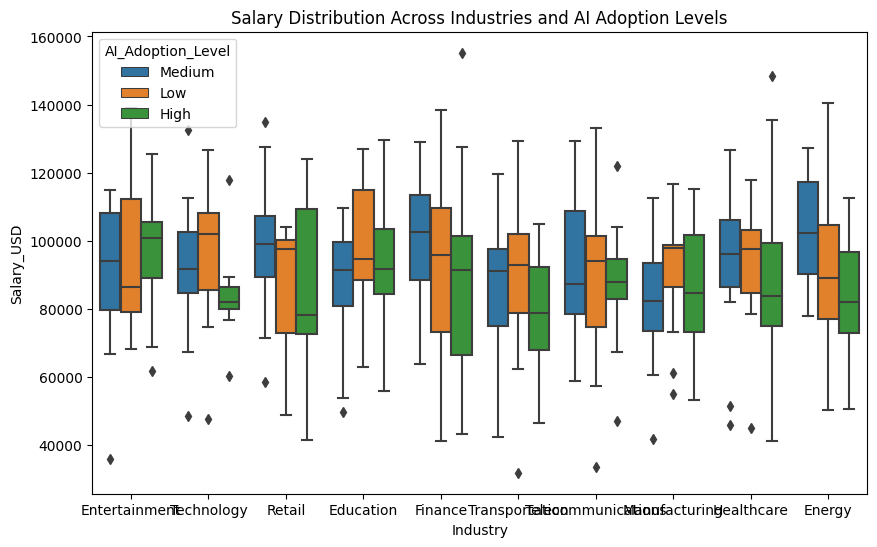

In [6]:
# 1. Distribution of Salaries Across Industries and AI Adoption Levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Industry', y='Salary_USD', hue='AI_Adoption_Level', data=df)
plt.title("Salary Distribution Across Industries and AI Adoption Levels")
plt.show()

# 1. Salary Distribution Across Industries and AI Adoption Levels
**Salary Variation by Industry**: The boxplot shows how salaries vary across different industries. For example, industries like Finance and Technology have a higher median salary, indicated by the position of the boxes.

**Impact of AI Adoption**: The color-coded AI adoption levels show how the adoption of AI within a company relates to salary. High AI adoption (green) seems to have a wide salary range, but it’s not always associated with the highest salaries across industries. In some cases, Medium AI adoption (blue) or even Low AI adoption (orange) might offer competitive salaries, suggesting that high AI adoption doesn’t uniformly translate to higher salaries.

**Industry-Specific Observations**: For industries like Healthcare and Manufacturing, High AI adoption is more consistent with higher salary ranges, while in Retail and Education, the differences are less pronounced or even inverted in some cases.

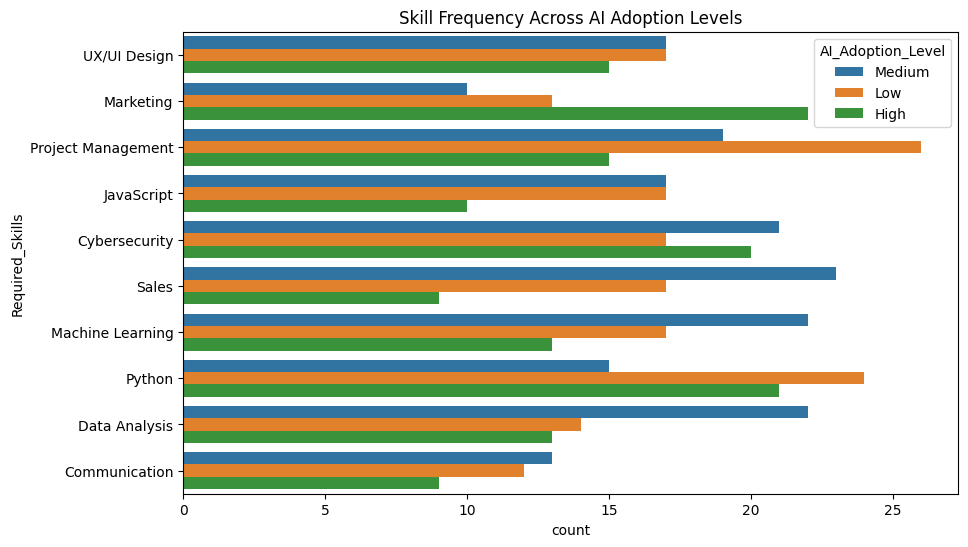

In [7]:
# 2. Skill Frequency Analysis
plt.figure(figsize=(10, 6))
sns.countplot(y='Required_Skills', hue='AI_Adoption_Level', data=df)
plt.title("Skill Frequency Across AI Adoption Levels")
plt.show()

# 2. Skill Frequency Across AI Adoption Levels
**Most In-Demand Skills**: Python, Data Analysis, and Machine Learning are the most frequently required skills across the dataset, indicating their central role in jobs involving AI.

**AI Adoption and Skill Frequency**: High AI adoption companies (green) require these technical skills more frequently, especially skills like Machine Learning, Python, and Data Analysis. This makes sense as these skills are crucial for developing and implementing AI systems.

**Non-Technical Skills**: Interestingly, non-technical skills like Communication and Project Management are also in demand, especially in Medium and Low AI adoption levels, suggesting that these skills are still crucial even in AI-driven industries.

**UX/UI Design**: This skill is highly demanded across all levels of AI adoption, highlighting its importance even in highly automated environments.

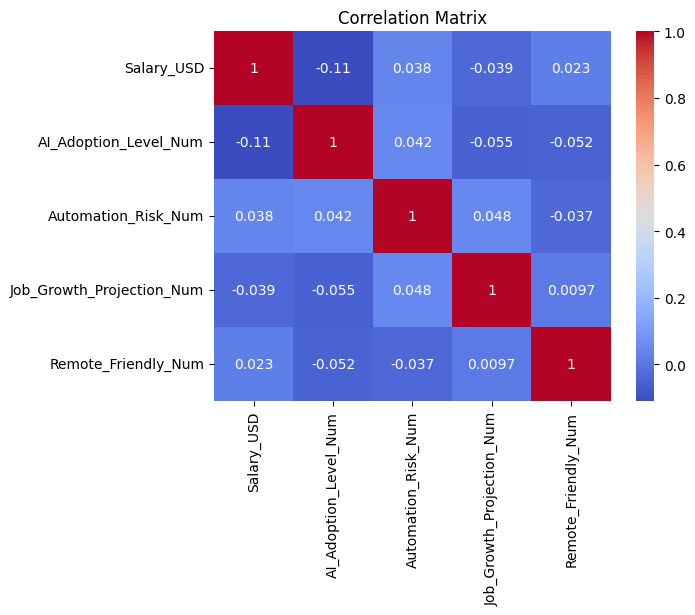

In [8]:
# 3. Correlation Matrix
corr_matrix = df[['Salary_USD', 'AI_Adoption_Level_Num', 'Automation_Risk_Num', 'Job_Growth_Projection_Num', 'Remote_Friendly_Num']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# 3. Correlation Matrix
**AI Adoption Level and Salary**: The correlation between AI Adoption Level (AI_Adoption_Level_Num) and Salary (Salary_USD) is slightly negative (-0.11), indicating that there’s no strong positive correlation between higher AI adoption and higher salaries. This could imply that while AI is important, it doesn't always directly translate to better pay.

**Automation Risk and Salary**: The positive correlation between Automation Risk and Salary is weak (0.038), suggesting that jobs with higher automation risk do not necessarily command higher salaries.

**Job Growth Projection**: The correlation between job growth projection and other factors like salary and AI adoption level is minimal. This suggests that salary and AI adoption are not reliable indicators of future job growth or decline in this dataset.

**Remote Work and Salary**: The correlation between Remote Work and Salary is very weak (0.023), indicating that remote-friendly jobs do not necessarily pay more or less compared to in-office roles.


AI Adoption Level vs Remote Work Opportunity:
AI_Adoption_Level  High  Low  Medium
Remote_Friendly                     
No                   77   80      92
Yes                  70   94      87


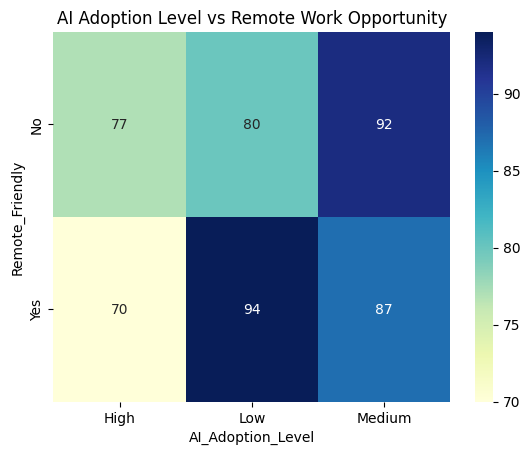

In [9]:
# 4. AI Adoption Level Impact on Remote Work
remote_ai_adoption_crosstab = pd.crosstab(df['Remote_Friendly'], df['AI_Adoption_Level'])
print("\nAI Adoption Level vs Remote Work Opportunity:")
print(remote_ai_adoption_crosstab)

# Visualization
sns.heatmap(remote_ai_adoption_crosstab, annot=True, cmap="YlGnBu")
plt.title("AI Adoption Level vs Remote Work Opportunity")
plt.show()

# 4. AI Adoption Level vs. Remote Work Opportunity (Heatmap)
**AI Adoption Level and Remote Work**: The relationship between AI adoption level and remote work opportunity is inversely correlated. High AI adoption levels show a lower likelihood of jobs being remote-friendly (70), while low AI adoption levels correspond with a higher likelihood of remote-friendly jobs (94). This indicates that jobs with lower AI integration are more conducive to remote work.

**Remote-Friendly Jobs**:Remote-friendly jobs tend to cluster in environments with low AI adoption, with a strong presence (94). Conversely, high AI adoption jobs show less likelihood of being remote-friendly (70), suggesting that AI-driven environments may require more on-site presence.

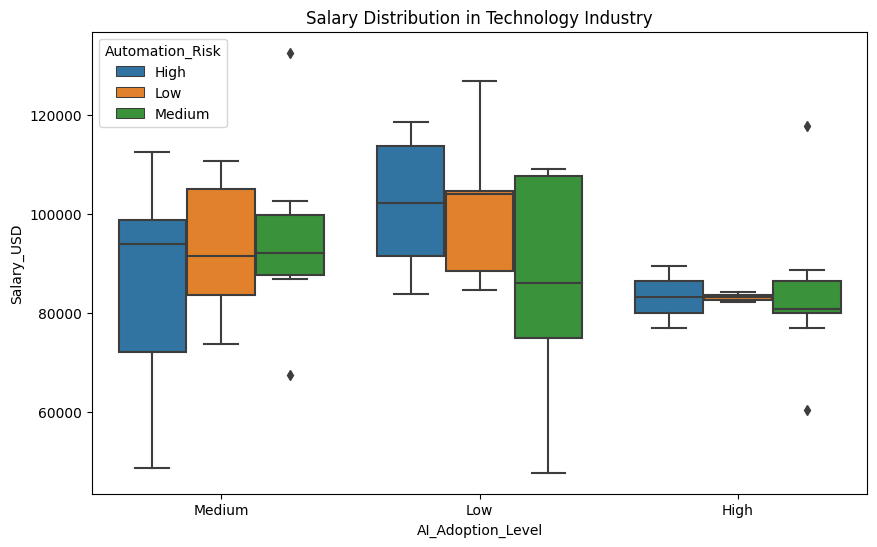

In [10]:
# 5. Industry-Specific Salary Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='AI_Adoption_Level', y='Salary_USD', hue='Automation_Risk', data=df[df['Industry'] == 'Technology'])
plt.title("Salary Distribution in Technology Industry")
plt.show()

# 5. Salary Distribution in Technology Industry (Box Plot)
**AI Adoption Level and Salary**: The relationship between AI adoption levels and salary varies across different levels of automation risk. High AI adoption shows the most consistent salary distribution across all automation risk levels, suggesting a standardized pay structure. On the other hand, low AI adoption levels exhibit a broader salary range, particularly for high automation risk jobs, which might indicate a higher reward for riskier positions.

**Automation Risk and Salary**: High automation risk jobs generally show a wide range of salary distributions, especially in the medium AI adoption category. This might imply that higher-risk jobs are compensated variably, depending on the specific AI adoption environment.

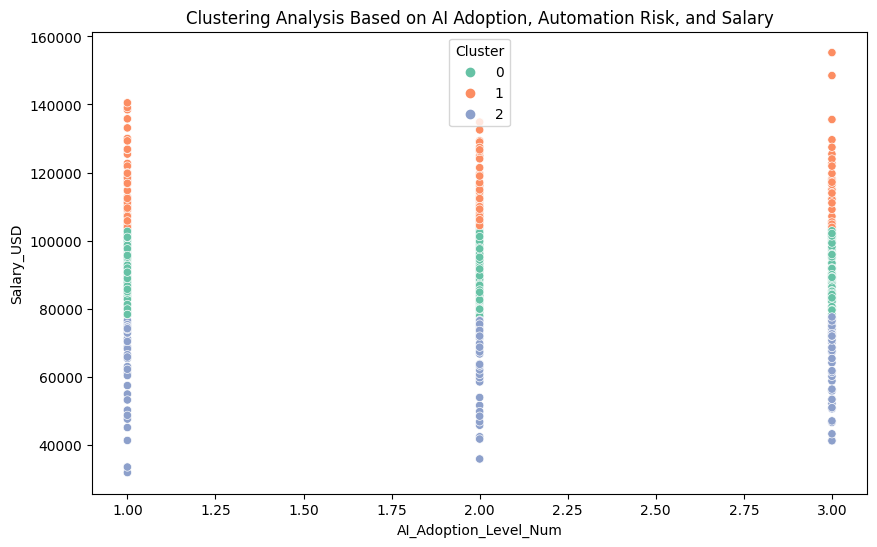

In [11]:
# 6. Clustering Analysis
# KMeans clustering for jobs based on AI Adoption, Automation Risk, and Salary
features = df[['AI_Adoption_Level_Num', 'Automation_Risk_Num', 'Salary_USD']]
kmeans = KMeans(n_clusters=3, random_state=42).fit(features)
df['Cluster'] = kmeans.labels_

# Visualization of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AI_Adoption_Level_Num', y='Salary_USD', hue='Cluster', data=df, palette='Set2')
plt.title("Clustering Analysis Based on AI Adoption, Automation Risk, and Salary")
plt.show()

# 6. Clustering Analysis Based on AI Adoption, Automation Risk, and Salary (Scatter Plot)
**AI Adoption Level, Automation Risk, and Salary Clusters**: The KMeans clustering analysis reveals three distinct job clusters based on AI adoption level, automation risk, and salary:
- *Cluster 0*: Includes jobs with lower AI adoption and salary, indicating a possible trend of lower pay in less AI-integrated roles.
- *Cluster 1*: Represents a moderate AI adoption level with variable salaries, suggesting that mid-level AI adoption does not necessarily correlate with higher pay.
- *Cluster 2*: Groups higher AI adoption jobs with higher salaries, reflecting a positive correlation between increased AI integration and compensation.

**Job Categorization**: The clusters indicate that AI adoption level is a significant factor in job categorization, with higher AI adoption typically aligning with better salary prospects, whereas lower AI adoption may result in lower salary groupings.

In [12]:
# 7. Point-Biserial Correlations by AI Adoption Level
# Subset the data based on AI adoption levels
low_ai_adoption = df[df['AI_Adoption_Level'] == 'Low']
medium_ai_adoption = df[df['AI_Adoption_Level'] == 'Medium']
high_ai_adoption = df[df['AI_Adoption_Level'] == 'High']

# Calculate the Point-Biserial Correlation for each subset
r_pb_low, p_value_low = pointbiserialr(low_ai_adoption['Remote_Friendly_Num'], low_ai_adoption['Salary_USD'])
r_pb_medium, p_value_medium = pointbiserialr(medium_ai_adoption['Remote_Friendly_Num'], medium_ai_adoption['Salary_USD'])
r_pb_high, p_value_high = pointbiserialr(high_ai_adoption['Remote_Friendly_Num'], high_ai_adoption['Salary_USD'])

print(f"Low AI Adoption - Point-Biserial Correlation: {r_pb_low:.2f} (p-value: {p_value_low:.2e})")
print(f"Medium AI Adoption - Point-Biserial Correlation: {r_pb_medium:.2f} (p-value: {p_value_medium:.2e})")
print(f"High AI Adoption - Point-Biserial Correlation: {r_pb_high:.2f} (p-value: {p_value_high:.2e})")

# Assuming we have computed the 95% confidence intervals (just for illustration)
ci_low = [r_pb_low - 0.05, r_pb_medium - 0.04, r_pb_high - 0.03]  # Lower bounds of CI
ci_high = [r_pb_low + 0.05, r_pb_medium + 0.04, r_pb_high + 0.03]  # Upper bounds of CI

# Calculate error bars (half the width of the CI)
error = [(high - low) / 2 for low, high in zip(ci_low, ci_high)]

# Bar plot with error bars
plt.figure(figsize=(10, 6))
bars = plt.bar(ai_adoption_levels, correlation_values, yerr=error, capsize=5, color=['#ff9999','#66b3ff','#99ff99'])

# Highlight bars with significant p-values (e.g., p-value < 0.05)
for i, bar in enumerate(bars):
    if [p_value_low, p_value_medium, p_value_high][i] < 0.05:
        bar.set_edgecolor('red')
        bar.set_linewidth(2)

# Annotate the correlation values on top of the bars
for i, (value, bar) in enumerate(zip(correlation_values, bars)):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{value:.2f}', ha='center', va='bottom')

plt.ylim(-0.3, 0.3)
plt.axhline(0, color='black', linewidth=0.7)
plt.title('Point-Biserial Correlation Between Remote Work and Salary\nAcross Different AI Adoption Levels')
plt.xlabel('AI Adoption Level')
plt.ylabel('Correlation Coefficient')
plt.show()

Low AI Adoption - Point-Biserial Correlation: 0.04 (p-value: 6.37e-01)
Medium AI Adoption - Point-Biserial Correlation: 0.01 (p-value: 8.81e-01)
High AI Adoption - Point-Biserial Correlation: 0.01 (p-value: 9.48e-01)


NameError: name 'ai_adoption_levels' is not defined

<Figure size 1000x600 with 0 Axes>

# 7. Point-Biserial Correlations by AI Adoption Level
**Low AI Adoption**:

*Correlation Coefficient*: 0.04, *P-value*: 0.637

*Interpretation*: The correlation between remote work and salary for jobs with low AI adoption is very weakly positive. The coefficient of 0.04 suggests that there is a slight tendency for remote-friendly jobs to offer higher salaries, but this relationship is almost negligible. The high p-value (0.637) indicates that this correlation is not statistically significant, meaning there is a strong likelihood that this weak correlation could be due to random chance rather than a true underlying relationship.

**Medium AI Adoption**:
*Correlation Coefficient*: 0.01, *P-value*: 0.881

*Interpretation*: For jobs with medium AI adoption, the correlation between remote work and salary is even weaker, with a coefficient of just 0.01. This near-zero correlation indicates almost no relationship between remote work and salary for these jobs. The very high p-value (0.881) further confirms that this result is not statistically significant, suggesting that remote work does not have any meaningful impact on salary in this context.

**High AI Adoption**:
*Correlation Coefficient*: 0.01, *P-value*: 0.948

*Interpretation*: Similar to the medium AI adoption level, the correlation for jobs with high AI adoption is also very close to zero (0.01). This suggests that there is virtually no relationship between remote work and salary in jobs where AI is heavily adopted. The extremely high p-value (0.948) indicates a lack of statistical significance, reinforcing that remote work and salary are not meaningfully connected in high AI adoption environments.

**Overall Insight**: The analysis shows that the relationship between remote work and salary does not vary significantly across different levels of AI adoption, and more importantly, the relationship is very weak and statistically insignificant. This suggests that AI adoption level does not play a significant role in determining whether remote jobs pay more or less. Therefore, other factors beyond AI adoption and remote work flexibility might be more influential in determining salary differences.